In [25]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rc('axes', axisbelow=True)
SSSSSMALL_SIZE = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SSSSSMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [26]:
login = os.getlogin( )
DATA_BASE = f"/home/{login}/Git/tc-hard/notebooks/notebooks.classification/results/"
FIGURE_BASE = f"/home/{login}/Git/tc-hard/notebooks/notebooks.classification-results/figures/"

In [27]:
df1 = pd.read_csv(DATA_BASE+"ergo2.pep+cdr3b.only-sampled-negs.hard-split.csv")
df2 = pd.read_csv(DATA_BASE+"ergo2.pep+cdr3b.only-sampled-negs.random-split.csv")
df3 = pd.read_csv(DATA_BASE+"nettcr2.pep+cdr3b.only-sampled-negs.hard-split.csv")
df4 = pd.read_csv(DATA_BASE+"nettcr2.pep+cdr3b.only-sampled-negs.random-split.csv")
df5 = pd.read_csv(DATA_BASE+"avib.pep+cdr3b.only-sampled-negs.hard-split.csv")
df6 = pd.read_csv(DATA_BASE+"avib.pep+cdr3b.only-sampled-negs.random-split.csv")

df1['Setting'] = 'ERGO II | Hard split'
df2['Setting'] = 'ERGO II | Random split'
df3['Setting'] = 'NetTCR-2.0 | Hard split'
df4['Setting'] = 'NetTCR-2.0 | Random split'
df5['Setting'] = 'AVIB | Hard split'
df6['Setting'] = 'AVIB | Random split'

results_df = pd.concat([df1, df2, df3, df4, df5, df6])

In [29]:
results_df = results_df.rename(columns={'metrics': 'Metrics', 'score': 'Score'})
results_df = results_df.sort_values(by=['Setting'])
results_df = results_df.sort_values(by=['Metrics'])
results_df = results_df[results_df['Metrics'] != 'Precision']
results_df = results_df[results_df['Metrics'] != 'Recall']
results_df = results_df[results_df['Metrics'] != 'Accuracy']

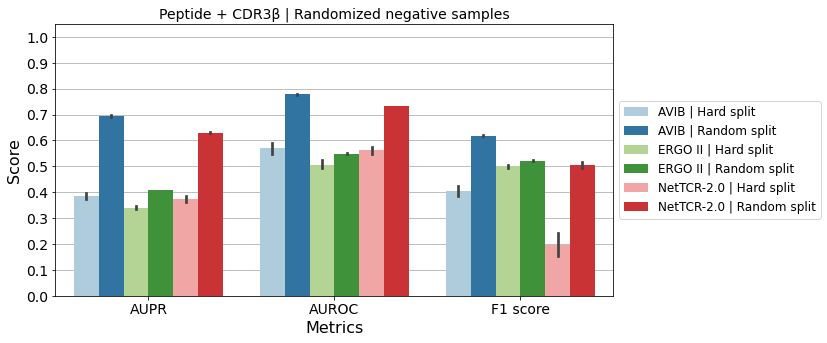

In [31]:
plt.rcParams['figure.figsize'] = [10, 5]
ax = sns.barplot(
    x="Metrics",
    y="Score", 
    hue="Setting", 
    data=results_df,
    palette=sns.color_palette("Paired", 6)
)
ax.set_title('Peptide + CDR3β | Randomized negative samples')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# legend = plt.legend(frameon = 1, loc="upper right")
frame = legend.get_frame()
frame.set_facecolor('white')
ax.grid(axis='y')
plt.yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim([0, 1.05])

plt.savefig(FIGURE_BASE + "avib-benhcmark.pep+cdr3b.png", format='png', dpi=300, bbox_inches='tight')